In [4]:
# Imports necesarios
import numpy as np #operaciones con vectores y matrices
import pandas as pd #extencion de numpy para analisis de datos
import seaborn as sb #basada en matplotlib para visualizacion de datos
import matplotlib.pyplot as plt # generacion de graficos
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D #graficos en 3d
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model #extencion de sklearn para regresion lineal
from sklearn.metrics import mean_squared_error, r2_score #extencion  de sklearn para RSME, metrica de ML

In [5]:
#cargamos los datos de entrada
data = pd.read_csv("/home/ricardo/articulos_ml.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [6]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [7]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


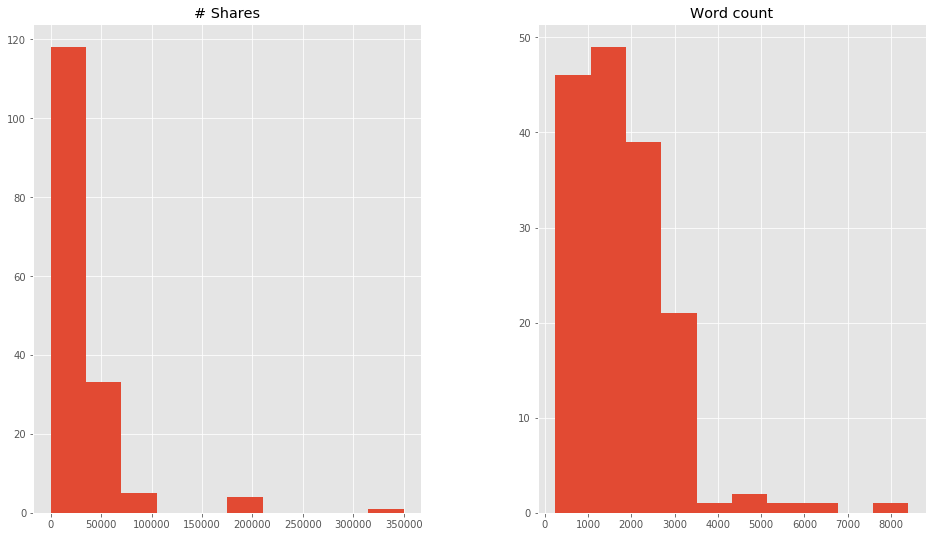

In [8]:

# Se eliminan las columnas irrelevantes para el ejercicio
data.drop(['Title','url', 'Elapsed days','# of Links','# of comments','# Images video'],1).hist()
plt.show()

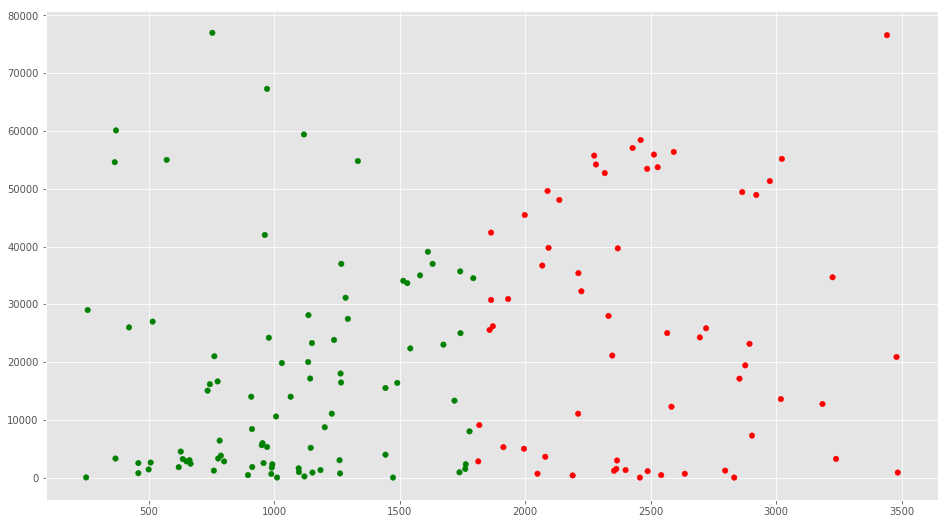

In [9]:
#Es posible filtrar un rango de datos utilizando operadores lógicos como condiciones dentro 
# de un arreglo de pandas, en este caso 'data'
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

#Se deben obtener los valores de cada columna, y por legibilidad del código se almacenan en 2 
#listas diferentes, los valores se extraen gracias a la propiedad .values que tienen los arreglos de pandas
PalabrasConFiltro = filtered_data['Word count'].values
CompartidsConFiltro = filtered_data['# Shares'].values
tamanioDelPunto=30#tamaño de pixeles de los puntos
# El siguiente for se utiliza para anexar la propiedad que corresponde al color que tendran los puntos
#dependiendo si esta por debajo o por encima de la  media que es 1808
palabrasConColor=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        palabrasConColor.append('red')#rojo si son muchas palabras
    else:
        palabrasConColor.append('green')#verde si son pocas
    
    #se utiliza scatter de matplotlib para para definir la forma de la grafica y finalmente se muestra con
    #la funcion show
                #EJE X            #EJE Y             #Palabras con color    #pixeles del punto
plt.scatter(PalabrasConFiltro, CompartidsConFiltro, c=palabrasConColor, s=tamanioDelPunto)
plt.show()

In [10]:
X_train =filtered_data[["Word count"]].values
y_train = filtered_data['# Shares'].values

# Se almacena en una variable la funcion para regresion lineal que es parte de scikit learn
regr = linear_model.LinearRegression()

# Utilizando regresion lineal se entrena el algoritmo
regr.fit(X_train, y_train)

# Se realizan predicciones con el modelo entrenado
y_pred = regr.predict(X_train)

#scores
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Mean squared error: 372888728.34
Variance score: 0.06


In [11]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


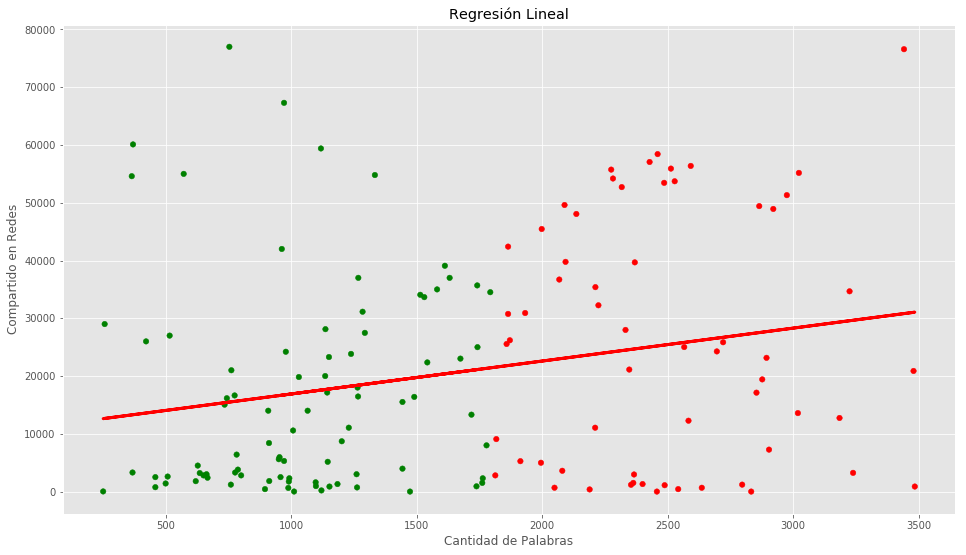

In [12]:

plt.scatter(X_train[:,0], y_train,  c=palabrasConColor, s=tamanioDelPunto)
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [13]:
##################################
########## Ejercicio 2 ###########
##################################

In [19]:
#Se suman las 3 columnas que conformarán la nueva variable predictora y se almacenan en suma
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
#se define la matriz que  contara con las variables predictoras y coressponden al eje X y Y 
dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
#mientras que la variable de salida se almacena en un arreglo diferente llamado z_train
z_train = filtered_data['# Shares'].values

In [23]:
# Se crea un nuevo objeto de regresion lineal, exactamente igual que como se hizo con la regresion lineal 
# simple regresionMultiple
regresionMultiple = linear_model.LinearRegression()

#El modelo se entrena de la misma forma que enregresion lineal simple, con la diferencia diferencia
#que de al tratarse de 2 variables predictoras el primer parametro recibe la matriz que las contiene
regresionMultiple.fit(XY_train, z_train)

# La prediccion se lleva a cabo de la misma forma que con la regresion simple, con la diferencia de que
# al tener 2 variables predictoras el parametro que recibe es una matriz de 2 dimensiones.
z_pred = regresionMultiple.predict(XY_train)

#El modelo, ha sido entrenado, a continuacion se calcula e impreme  el error cuadratico medio y la r2

print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))

print('Variance score: %.2f' % r2_score(z_train, z_pred))

Mean squared error: 352122816.48
Variance score: 0.11


Text(0.5,0.92,'Regresión Lineal con Múltiples Variables')

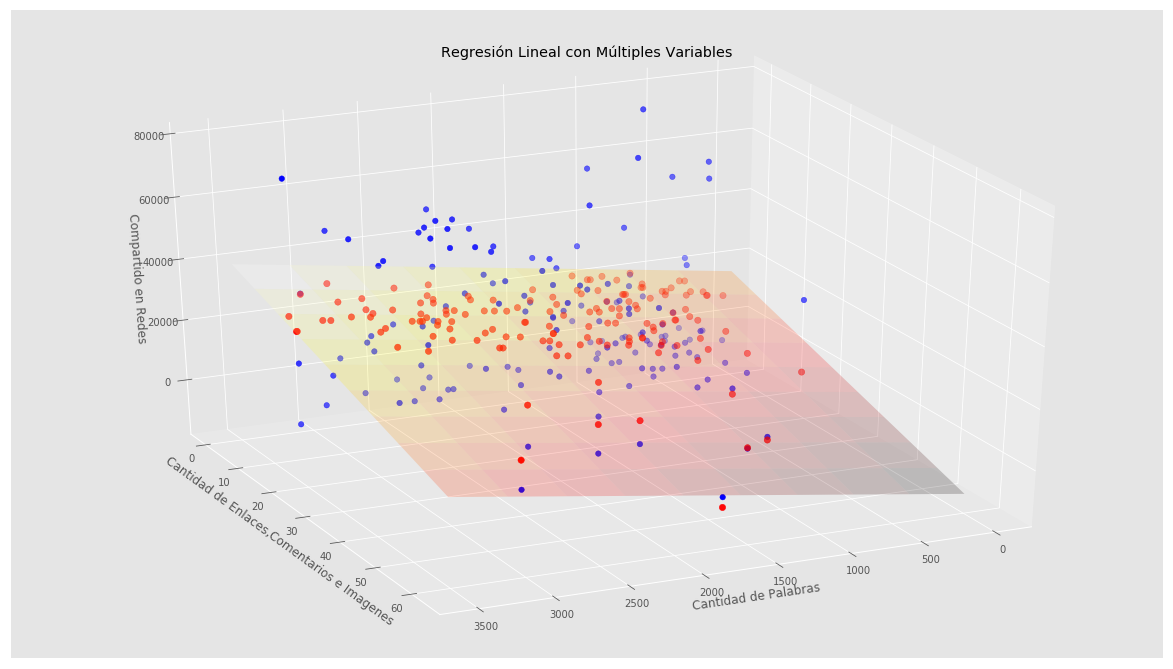

In [21]:
# se instancian las librerias que permiten graficar en 3d
fig = plt.figure()
ax = Axes3D(fig)

# Se crea el canvas 3D
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

#Los ejes X y Y toman nuevos valores calculando su coeficiente
nuevoX = (regresionMultiple.coef_[0] * xx)
nuevoY = (regresionMultiple.coef_[1] * yy) 

# Z toma el valor de la suma  de los nuevos valores de X y Y mas el punto de intercepcion 
z = (nuevoX + nuevoY + regresionMultiple.intercept_)

# Se grafica el plano 3d
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

#Se grafican las variables de entrada en color azul
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Se grafican las predicciones en color rojo
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# Se establece el punto de vista de la grafica en 3d
ax.view_init(elev=30., azim=65)
        
# se establecen las etiquetas de los ejes    
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [24]:
#Para realizar nuevas predicciones, el primer parametro corresponde al numero de palabras, el segundo parametro 
#corresponde a la suma de  la cantidad de comentarios, enlaces e imagenes
 
z_Dosmil = regresionMultiple.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518
